# Drawing keypoints, descriptors, and matches

After you've found the keypoints, you undoubtedly want to see where these keypoints are in the original image. OpenCV serves as a convenient way to display the keypoints and other related information. Moreover, you can easily draw a correspondence between keypoints from different images. This recipe tells you about how you can visualize keypoints as well as matching results.

To visualize keypoints, you need to use `cv2.drawKeypoints`. This function takes a source image, a list of keypoints, a destination image, a color, and flags as arguments. In the simplest case, you only need to pass the first three. The source image is used as a background, but it isn't changed by this function, and the result will be placed in the destination image. The list of keypoints is an object, which is returned by the keypoints detector, so you can pass this list directly to the `cv2.drawKeypoints` function without any processing. The color is simply the drawing color. The last parameter, flags, allows you to control the drawing mode—by default, it has the `cv2.DRAW_MATCHES_FLAGS_DEFAULT` value, and in this case, the keypoints are displayed as plain circles of the same diameter. The second option for this flag is `cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS`. In this case, the points will be drawn as circles with different diameters, and the orientation will also be displayed with a line from the center of the circle. The drawn diameter of the keypoint  shows the neighborhood, which was used to compute the keypoint; orientation shows specific direction for the keypoint, if the keypoint has such one. `cv2.drawKeypoints` returns the resulting image with drawn keypoints.

`cv2.drawMatches` helps you show the correspondences you have between points after the keypoints matching process. The arguments of this function are: the first image and the list of keypoints for it, the second image and its keypoints, a list of match results for the keypoints, a destination image, a color for drawing correspondences, a color for drawing keyponts without matches, a mask for drawing matches, and a flag. Usually, you have values for the first five parameters after keypoints detection and matching. Colors for matched and unmatched (single) points are generated randomly by default, but you can set them with any values. A mask for matches is a list of values where a non-zero value means the corresponding match (with the same index) should be displayed. By default, the mask is empty and all matches are drawn. The last argument controls the mode of keypoints being displayed. It can be set to `cv2.DRAW_MATCHES_FLAGS_DEFAULT` or `cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS` and optionally conjugated with the `cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS` value.

The first two values have the same meaning as the `cv2.drawKeypoints` function. The final value, `cv2.DRAW_MATCHES_FLAGS_NOT_DRAW_SINGLE_POINTS`, allows you to not show the keypoints without matches.

In [1]:
# Import all of the necessary modules
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os

%matplotlib auto
%pylab inline

def print_image(header,name,np_arr,
                start_First=0,end_First=1,start_Second=0,end_Second=2,start_3=0,end_3=5):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        if shapes[2] < end_3:
            end_3 = shapes[2]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", sep='',end="")
            for j in range (start_Second,end_Second):
                print(np_arr[i,j,start_3:end_3], sep=' ', end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            #print(np_arr[i,start_Second:end_Second],sep=' ',end=" ") cutoff sting by<60
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')

def draw_grid(img, pxystep=None,major_color=None,
              pxstep=None,pystep=None
             ):
    pXYstep = None; pXstep=None; pYstep=None; 
    major_Color=None; minor_Color=None; major_Alpha=None; minor_Alpha=None;
    if pxystep != None:
        pXYstep = pxystep; pXstep  = pxystep; pYstep  = pxystep;
    pXstep = pxstep if pxstep != None else 100
    pYstep = pystep if pystep != None else 100
    major_Color = major_color if major_color != None else (204, 204, 204) #'#CCCCCC'
    if pXstep != None:
        x = pXstep
        #Draw all lines on X
        while x < img.shape[1]:
            cv2.line(img, (x, 0), (x, img.shape[0]), color=major_Color, thickness=1)
            x += pXstep
    if pYstep != None:
        y = pYstep
        #Draw all lines on Y
        while y < img.shape[0]:
            cv2.line(img, (0, y), (img.shape[1], y), color=major_Color,thickness=1)
            y += pYstep
    return img
            
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis); plt.title(name)
        if cmap =='gray': plt.imshow(img,cmap='gray' )
        else: plt.imshow(img)
        plot_number = plot_number + 1
    plt.show()

def plt_view_grid(plt, axis ='off',
                  xy_sizeaxis =None,
                  xy_measuare =None,
                  x_min=-10, x_max=10, y_min=-10, y_max=10,
                  x_major_size=1, x_minor_size=0.2, y_major_size=1, y_minor_size=0.2,
                  major_color='#CCCCCC', major_alpha=0.5,
                  minor_color='#CCCCCC', minor_alpha=0.2
                 ):
    if xy_sizeaxis is None:  x_min=-10; x_max=10; y_min=-10; y_max=10;
    else: x_min, x_max, y_min, y_max = xy_sizeaxis

    if xy_measuare is None:  x_major_size=1; x_minor_size=0.2; y_major_size=1; y_minor_size=0.2;
    else: x_major_size, x_minor_size, y_major_size, y_minor_size = xy_measuare
        
    plt.xlim(x_min, x_max); plt.ylim(y_min, y_max);
    ax = plt.gca()
    x_major_ticks=np.arange(x_min,x_max,x_major_size); x_minor_ticks=np.arange(x_min,x_max,x_minor_size)
    y_major_ticks=np.arange(y_min,y_max,y_major_size); y_minor_ticks=np.arange(y_min,y_max,y_minor_size)
    ax.set_xticks(x_major_ticks)
    ax.xaxis.set_major_locator(MultipleLocator(x_major_size))
    ax.set_xticks(x_minor_ticks, minor=True)
    ax.set_yticks(y_major_ticks)
    ax.yaxis.set_major_locator(MultipleLocator(y_major_size))
    ax.set_yticks(y_minor_ticks, minor=True)
    plt.grid(which='major', color=major_color, alpha=major_alpha)
    plt.grid(which='minor', color=minor_color, alpha=minor_alpha)
    
#help("modules")   
import sys             
print('\n'.join(sys.path))
print("current folder ==",os.getcwd())
#pip list

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S07\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s07\env

d:\html_doc\program\opencv\packt\s07\env\lib\site-packages
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s07\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython
current folder == D:\HTML_DOC\Program\opencv\Packt\S07\env


------  data/scenetext01.jpg-----    Shape(600, 800, 3) img_orig: uint8
[[203 172 193] [137 118 135] [60 62 72] [49 77 77] [ 47 102  93] [ 44 120 102] [ 51 137 113] ]
[[164 136 159] [143 127 145] [71 75 86] [26 56 57] [35 90 81] [ 80 153 137] [ 98 181 159] ]


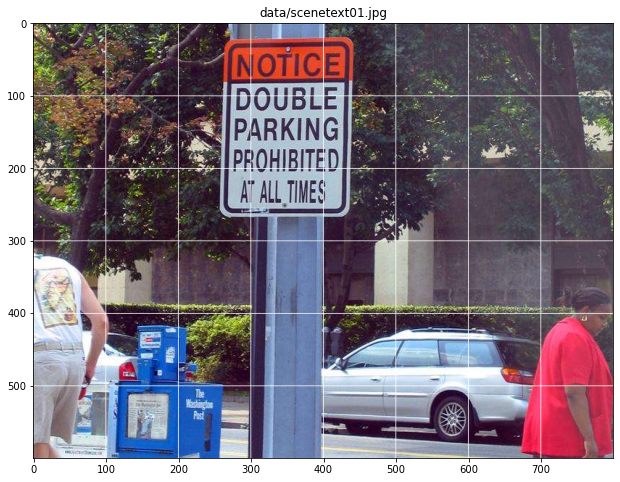

In [2]:
image_orig = cv2.imread('../data/scenetext01.jpg', cv2.IMREAD_COLOR)



#######################################################
print_image('data/scenetext01.jpg','img_orig',image_orig,0,2,0,7)
plt_view_image(plt,[["data/scenetext01.jpg",
                     draw_grid(np.copy(image_orig),100,(255,255,255))[:,:,[2,1,0]]]],
               figsize=(16,8), axis='on', cmap='gray')

In [3]:
fast = cv2.FastFeatureDetector_create(160, True, cv2.FAST_FEATURE_DETECTOR_TYPE_9_16)


###############################################
# Print all default params
print("Threshold: {}".format(fast.getThreshold()) )
print("nonmaxSuppression:{}".format(fast.getNonmaxSuppression()) )
print("neighborhood: {}".format(fast.getType()) )

Threshold: 160
nonmaxSuppression:True
neighborhood: 2


#### find the FAST keypoints 

Total Keypoints with nonmaxSuppression: 101 
kp.shape == (101, 2)
<KeyPoint 000002093C8A7810>
------  cv2.KeyPoint_convert-----    Shape(101, 2) kps: float32
[ 32.0 15.0 ]
[ 161.0 27.0 ]
[ 183.0 33.0 ]
[ 172.0 46.0 ]
[ 164.0 56.0 ]
[ 96.0 67.0 ]
7.0 -1.0
7.0 -1.0
7.0 -1.0
7.0 -1.0
7.0 -1.0
7.0 -1.0


<ipython-input-4-afacc9338863>:27: DeprecationWarning: an integer is required (got type numpy.float32).  Implicit conversion to integers using __int__ is deprecated, and may be removed in a future version of Python.
  cv2.circle(img_FASTnotsupres, tuple(p), 4, (0, 255, 255), cv2.FILLED)


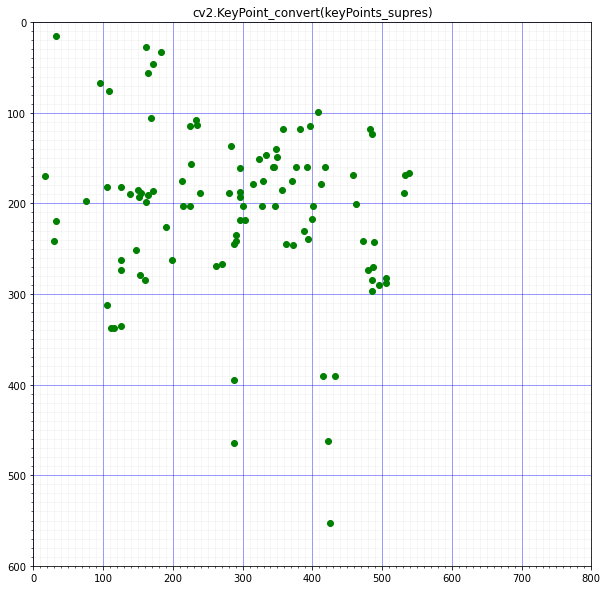

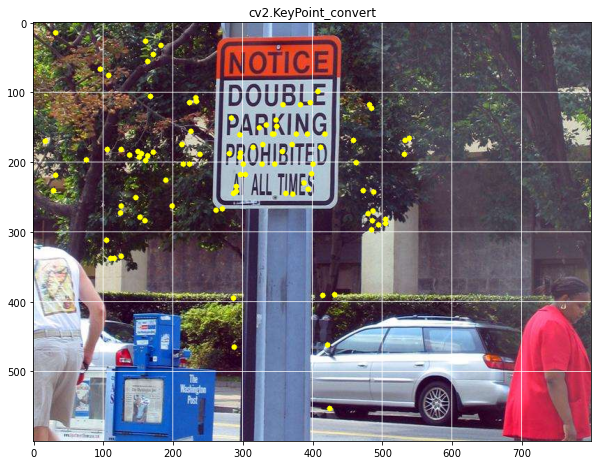

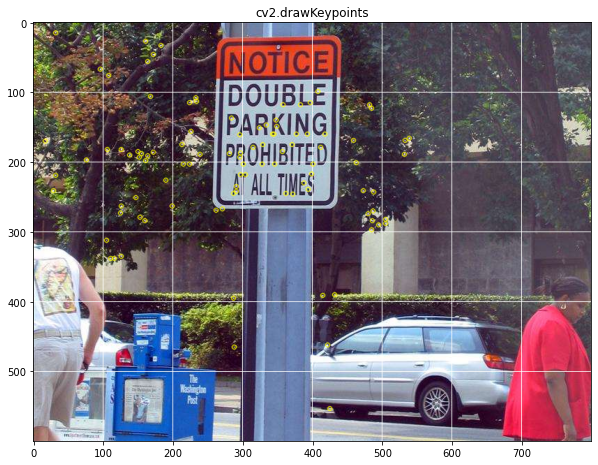

In [4]:
keyPoints_supres = fast.detect(image_orig)




#####################################################
print( "Total Keypoints with nonmaxSuppression: {0} ".format(len(keyPoints_supres)) )
print('kp.shape ==',cv2.KeyPoint_convert(keyPoints_supres).shape )
print(keyPoints_supres[0])

#cv2.KeyPoint([x, y, _size[, _angle[, _response[, _octave[, _class_id]]]]]) → <KeyPoint object
# x – x-coordinate of the keypoint
# y – y-coordinate of the keypoint
# _pt – x & y coordinates of the keypoint
# _size – keypoint diameter
# _angle – keypoint orientation
# _response – keypoint detector response on the keypoint (that is, strength of the keypoint)
# _octave – pyramid octave in which the keypoint has been detected
# _class_id – object id

kps = cv2.KeyPoint_convert(keyPoints_supres)
print_image('cv2.KeyPoint_convert','kps',kps,0,6,0,2)
for kp in keyPoints_supres[:6]: print(kp.size, kp.angle)

img_FASTnotsupres = draw_grid(np.copy(image_orig),100,(255,255,255))
for p in cv2.KeyPoint_convert(keyPoints_supres):
    cv2.circle(img_FASTnotsupres, tuple(p), 4, (0, 255, 255), cv2.FILLED)

image_drawKeypoints = cv2.drawKeypoints(draw_grid(np.copy(image_orig),100,(255,255,255)), 
                                        keyPoints_supres, None, (0,255, 255))
##############################
plt.figure(figsize=(10,10))
plt_view_grid(plt, 'on',(0,800,0,600),(100,10,100,10),major_color='b')
plt.title('cv2.KeyPoint_convert(keyPoints_supres)')
plt.plot(kps[:,0],kps[:,1],'o', color="green")
plt.gca().invert_yaxis()
plt.show()

plt_view_image(plt,[["cv2.KeyPoint_convert",img_FASTnotsupres[:,:,[2,1,0]]]],
               figsize=(10,10), axis='on', cmap='gray')
plt_view_image(plt,[["cv2.drawKeypoints", image_drawKeypoints[:,:,[2,1,0]]]],
               figsize=(10,10), axis='on', cmap='gray')

#### fill in the size and orientation of each keypoint with random values:

In [5]:
for kp in keyPoints_supres:
    kp.size = 100*random.random()
    kp.angle = 360*random.random()

matches = []
for i in range(len(keyPoints_supres)):
    matches.append(cv2.DMatch(i, i, 1))
    
    
#######################################
print( "{0}  kp.shape =={1}".format(len(keyPoints_supres),cv2.KeyPoint_convert(keyPoints_supres).shape))
print(keyPoints_supres[0])
print(len(matches))

101  kp.shape ==(101, 2)
<KeyPoint 000002093C8A7810>
101


####  Draw the keypoints:

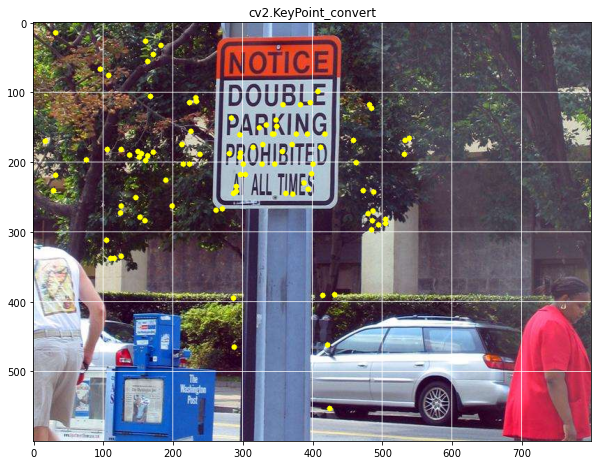

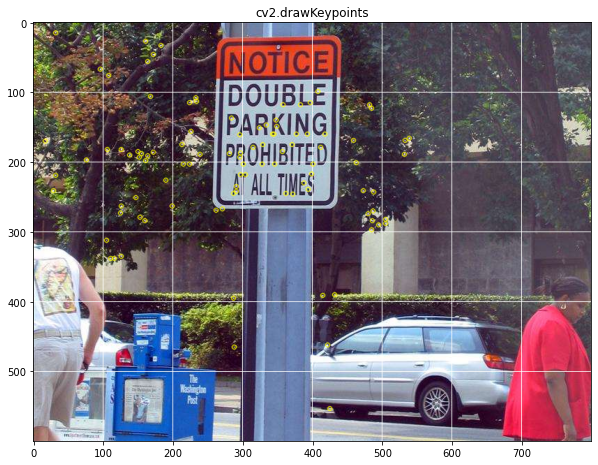

In [6]:
image_drawKeypoints = cv2.drawKeypoints(draw_grid(np.copy(image_orig),100,(255,255,255)), keyPoints_supres, 
                                        None, (0,255, 255))



#################################################
plt_view_image(plt,[["cv2.KeyPoint_convert",img_FASTnotsupres[:,:,[2,1,0]]]],
               figsize=(10,10), axis='on', cmap='gray')
plt_view_image(plt,[["cv2.drawKeypoints", image_drawKeypoints[:,:,[2,1,0]]]],
               figsize=(10,10), axis='on', cmap='gray')

cv2.imshow('Keypoints image_drawKeypoints', image_drawKeypoints)
cv2.waitKey()
cv2.destroyAllWindows()

####  Visualize the size and orientation information about the keypoints:

In [7]:
image_DRAW_MATCHES_FLAGS = cv2.drawKeypoints(draw_grid(np.copy(image_orig),100,(255,255,255)), keyPoints_supres, 
                                             None, (0, 255, 0), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

cv2.imshow('Keypoints DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS', image_DRAW_MATCHES_FLAGS)
cv2.waitKey()
cv2.destroyAllWindows()

#### Show the keypoint's matching results:

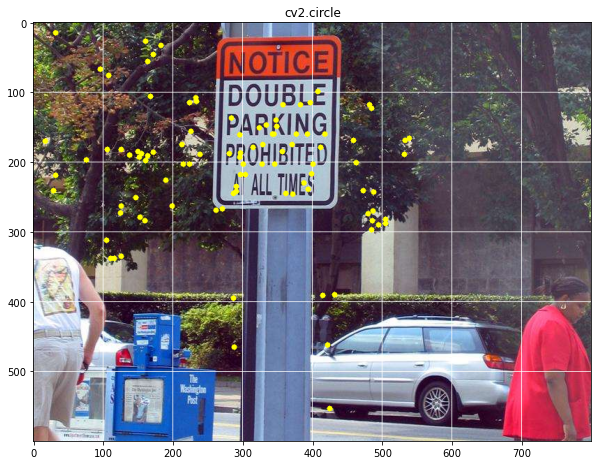

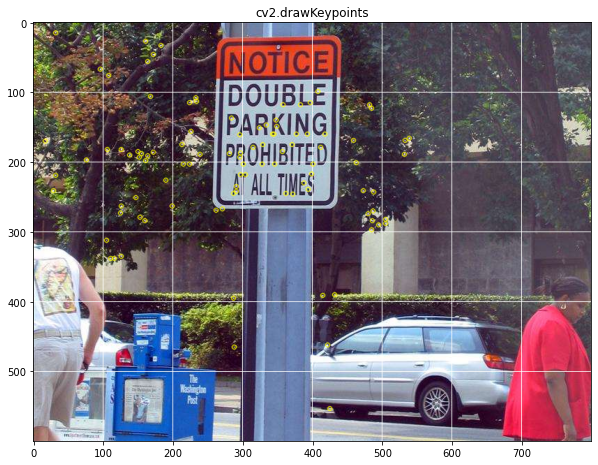

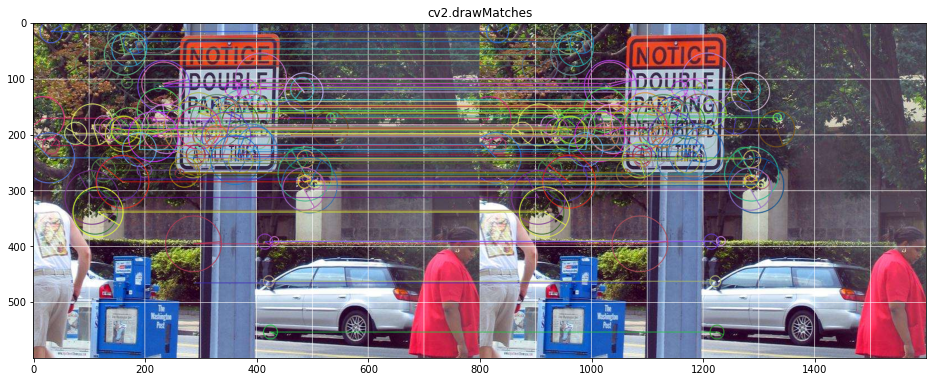

In [8]:
image_2_DRAW_MATCHES = cv2.drawMatches(draw_grid(np.copy(image_orig),100,(255,255,255)), keyPoints_supres,
                                       draw_grid(np.copy(image_orig),100,(255,255,255)), keyPoints_supres,
                                       matches, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)



#################################################
plt_view_image(plt,[["cv2.circle",img_FASTnotsupres[:,:,[2,1,0]]]],
               figsize=(10,10), axis='on', cmap='gray')
plt_view_image(plt,[["cv2.drawKeypoints", image_drawKeypoints[:,:,[2,1,0]]]],
               figsize=(10,10), axis='on', cmap='gray')

plt_view_image(plt,[["cv2.drawMatches", image_2_DRAW_MATCHES[:,:,[2,1,0]]]],
               figsize=(16,10), axis='on', cmap='gray')

cv2.imshow('Matches DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS', image_2_DRAW_MATCHES)
cv2.waitKey()
cv2.destroyAllWindows()